# Verify ML in commuter context
The code below takes labelled data, trains a standard fastai neural network and as a [tabular application](https://docs.fast.ai/tabular.html).
The goal is to verify that the model learns using data created using our personas.
* [Maria](../personas/maria.md) id:tnK534JMwwfhvUEycn69HPbhqkt2
    * [One year data](../data/tnK534JMwwfhvUEycn69HPbhqkt2_train_valid.csv)
    * [Test set](../data/tnK534JMwwfhvUEycn69HPbhqkt2_test.csv)
* [Andrea](../personas/andrea.md) id:ehaBtfOPDNZjzy1MEvjQmGo4Zv12
    * [One year data](../data/ehaBtfOPDNZjzy1MEvjQmGo4Zv12_train_valid.csv)
    * [Test set](../data/ehaBtfOPDNZjzy1MEvjQmGo4Zv12_test.csv)
* [Björn](../personas/bjorn.md) id:hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2
    * [One year data](../data/hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_train_valid.csv)
    * [Test set](../data/hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_test.csv)

In [1]:
#Setup
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai
from fastai.vision import *
PATH="../data/"
dep_var = 'journey'
cat_names = ["detectedActivity","weekday"]
cont_names =["geoHash","minuteOfDay"]
procs = [FillMissing, Categorify, Normalize]
# Uncomment active user'
#user = "tnK534JMwwfhvUEycn69HPbhqkt2" #Maria
#user = "ehaBtfOPDNZjzy1MEvjQmGo4Zv12" #Andrea
user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2" #Bjorn

def predict_journeys(learner,dataset):
    result = 0
    accuracy = 0
    for x in range(0,dataset.shape[0]):
        correct = dataset.iloc[x].journey  #remove journey
        predicted = learner.predict(dataset.iloc[x]);
        if (str(correct)==str(predicted[0])):
            result=result+1
    accuracy=result/dataset.shape[0]
    return(accuracy)

### Training
Trainsmodel using one year data, and learning rate finder with fit_one_cycle policy.
Validation set is randomly selected as 10% of training set.

epoch,train_loss,valid_loss,accuracy
1,0.776638,1.008562,0.899083
2,0.390335,0.091502,1.000000
3,0.190657,0.010180,1.000000
4,0.100198,0.005433,1.000000
5,0.055190,0.003818,1.000000
6,0.031805,0.003430,1.000000
7,0.019172,0.003643,1.000000


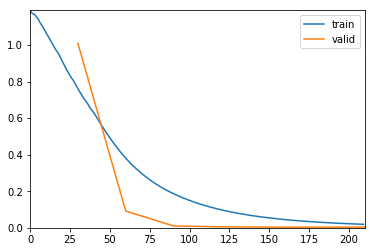

CPU times: user 2.44 s, sys: 632 ms, total: 3.08 s
Wall time: 3.72 s


In [2]:
dataSet = pd.read_csv(PATH+user+"_train_valid.csv")
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet, path=user, cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var)
                .databunch())
learner=tabular_learner(data, layers=[200,100], metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(7)

In [3]:
test_df = pd.read_csv(PATH+user+"_test.csv")
print("Result on test set for user "+user+" "+str(predict_journeys(learner,test_df)))

Result on test set for user hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2 1.0
